In [21]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [22]:
train_path = r"C:\Users\shive\Downloads\DataSet\train"
validation_path = r"C:\Users\shive\Downloads\DataSet\validation"
test_path = r"C:\Users\shive\Downloads\DataSet\test"

In [23]:
BATCH_SIZE = 32
IMAGE_SHAPE = (224, 224)

In [24]:
# Create ImageDataGenerator objects
train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load data using flow_from_directory
print("Train data:")
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=IMAGE_SHAPE,
                                               shuffle=True,
                                               batch_size=BATCH_SIZE)

print("Validation data:")
validation_data = validation_datagen.flow_from_directory(validation_path,
                                                         target_size=IMAGE_SHAPE,
                                                         batch_size=BATCH_SIZE)

print("Test data:")
test_data = test_datagen.flow_from_directory(test_path,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE)

Train data:
Found 3115 images belonging to 36 classes.
Validation data:
Found 351 images belonging to 36 classes.
Test data:
Found 359 images belonging to 36 classes.


In [26]:
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet/TensorFlow1/b0-classification/1"

In [27]:
from model_utils import create_model

In [28]:
# Define number of classes
NUM_CLASSES = train_data.num_classes

# Create and compile the ResNet model
eff_model = create_model(model_url=efficientnet_url,
                            num_classes=NUM_CLASSES,
                            image_shape=IMAGE_SHAPE)

eff_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [29]:
# Train the EffNet model
print("Training EffNet Model...")
eff_history = eff_model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)

Training EffNet Model...
Epoch 1/10
98/98 [==============================] - 109s 1s/step - loss: 3.0609 - accuracy: 0.4128 - val_loss: 1.1074 - val_accuracy: 0.8604
Epoch 2/10
98/98 [==============================] - 97s 986ms/step - loss: 1.5164 - accuracy: 0.7281 - val_loss: 0.8809 - val_accuracy: 0.9003
Epoch 3/10
98/98 [==============================] - 322s 3s/step - loss: 1.1996 - accuracy: 0.7965 - val_loss: 0.7822 - val_accuracy: 0.9174
Epoch 4/10
98/98 [==============================] - 94s 960ms/step - loss: 1.0271 - accuracy: 0.8238 - val_loss: 0.7091 - val_accuracy: 0.9031
Epoch 5/10
98/98 [==============================] - 96s 976ms/step - loss: 0.9131 - accuracy: 0.8517 - val_loss: 0.6440 - val_accuracy: 0.9288
Epoch 6/10
98/98 [==============================] - 96s 976ms/step - loss: 0.8113 - accuracy: 0.8697 - val_loss: 0.5839 - val_accuracy: 0.9516
Epoch 7/10
98/98 [==============================] - 97s 988ms/step - loss: 0.7490 - accuracy: 0.8880 - val_loss: 0.5448 -

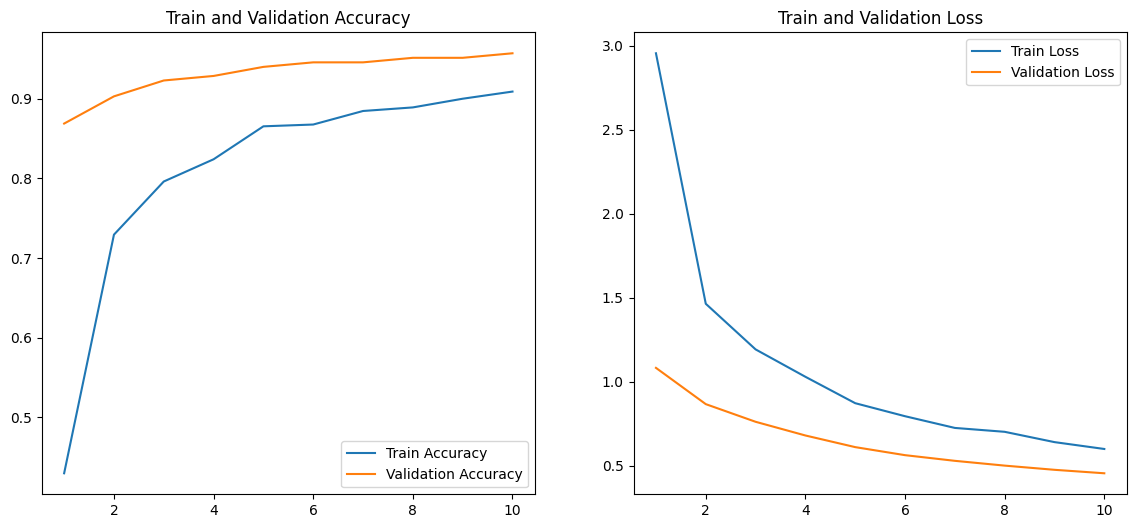

In [18]:
# Plot accuracy and loss
def plot_accuracy_and_loss(history):
    """
    Plots accuracy and loss curves for training and validation.

    Args:
        history: History object from model training.
    """
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.title("Train and Validation Accuracy")
    plt.plot(epochs, history.history['accuracy'], label="Train Accuracy")
    plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.title("Train and Validation Loss")
    plt.plot(epochs, history.history['loss'], label="Train Loss")
    plt.plot(epochs, history.history['val_loss'], label="Validation Loss")
    plt.legend()

    plt.show()

plot_accuracy_and_loss(eff_history)

In [31]:
# Evaluate the model
print("Evaluating EffNet Model...")
loss, accuracy = eff_model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.2f}")

Evaluating EffNet Model...
12/12 [==============================] - 13s 1s/step - loss: 0.4751 - accuracy: 0.9415
Test Accuracy: 0.94


In [33]:
eff_model.save("EffNet.h5")

In [34]:
import json

In [35]:
history_dict = eff_history.history
with open('EffNet_history.json', 'w') as f:
    json.dump(history_dict,f)